In [2]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forest fire data, HEATMAP

In [3]:
use_collab = True

if use_collab == True:
    from google.colab import drive
    drive.mount('/content/drive')
    # https://www.kaggle.com/datasets/sumitm004/forest-fire-area?resource=downloadcwd = os.getcwd()
    path = "drive/MyDrive/PEC2, Visualización de datos/forestfires.csv"
else:
    path = r"./datasets_pec2/forestfires.csv"

print("Current Working Directory: ", os.path.join(os.getcwd(), path))

with open(os.path.join(os.getcwd(), path)) as file:
    data = pd.read_csv(file)

file.close()

Current Working Directory:  /content/drive/MyDrive/PEC2, Visualización de datos/forestfires.csv


In [4]:
print(data.head())
print(data.columns)
print(len(data))

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
517


In [5]:
data = data[["X", "Y", "month", "temp"]]
data_gb = data.groupby(["X","Y","month"]).mean()
data_gb.reset_index(inplace=True)

In [6]:
data_aug = data_gb[data_gb.month == "aug"]
data_sep = data_gb[data_gb.month == "sep"]
data_jul = data_gb[data_gb.month == "jul"]
data_jun = data_gb[data_gb.month == "jun"]

print(len(data_aug)+len(data_sep)+len(data_jun)+len(data_jul))

80


In [7]:
data_aug = data_aug.sort_values(by=["X","Y"])
data_sep = data_sep.sort_values(by=["X","Y"])
data_jun = data_jun.sort_values(by=["X","Y"])
data_jul = data_jul.sort_values(by=["X","Y"])

print(len(data_aug)+len(data_sep)+len(data_jun)+len(data_jul))

80


In [8]:
print(len(data_aug)+len(data_sep)+len(data_jun)+len(data_jul))

data_aug

80


,X,Y,month,temp
0,1,2,aug,20.783333
3,1,3,aug,27.350000
6,1,4,aug,19.000000
10,2,2,aug,21.778571
16,2,4,aug,23.435294
20,2,5,aug,23.360000
26,3,4,aug,19.437500
33,3,5,aug,17.600000
39,4,3,aug,22.571429
47,4,4,aug,21.980000


In [9]:
data_sep

,X,Y,month,temp
2,1,2,sep,22.680000
5,1,3,sep,19.920000
8,1,4,sep,19.587500
9,1,5,sep,25.000000
14,2,2,sep,19.440000
15,2,3,sep,18.000000
19,2,4,sep,21.325000
24,2,5,sep,18.660000
25,3,3,sep,24.200000
32,3,4,sep,19.791667


In [10]:
map_aug = np.zeros((9, 9))
for i in range(len(map_aug)):
  for j in range(len(map_aug[0])):
    if len(data_aug.loc[(data_aug.X == j) & (data_aug.Y == i)]) > 0:
      map_aug[i, j] = data_aug.loc[(data_aug.X == j) & (data_aug.Y == i)]["temp"]
    else:
      map_aug[i, j] = np.nan

<ipython-input-10-381289ca21f1>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  map_aug[i, j] = data_aug.loc[(data_aug.X == j) & (data_aug.Y == i)]["temp"]


In [11]:
map_sep = np.zeros((9, 9))
for i in range(len(map_sep)):
  for j in range(len(map_sep[0])):
    if len(data_sep.loc[(data_sep.X == j) & (data_sep.Y == i)]) > 0:
      map_sep[i, j] = data_sep.loc[(data_sep.X == j) & (data_sep.Y == i)]["temp"]
    else:
      map_sep[i, j] = np.nan

<ipython-input-11-42edd7602466>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  map_sep[i, j] = data_sep.loc[(data_sep.X == j) & (data_sep.Y == i)]["temp"]


In [12]:
map_jun = np.zeros((9, 9))
for i in range(len(map_jun)):
  for j in range(len(map_jun[0])):
    if len(data_jun.loc[(data_jun.X == j) & (data_jun.Y == i)]) > 0:
      map_jun[i, j] = data_jun.loc[(data_jun.X == j) & (data_jun.Y == i)]["temp"]
    else:
      map_jun[i, j] = np.nan

<ipython-input-12-77e0f70cba3b>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  map_jun[i, j] = data_jun.loc[(data_jun.X == j) & (data_jun.Y == i)]["temp"]


In [13]:
map_jul = np.zeros((9, 9))
for i in range(len(map_jul)):
  for j in range(len(map_jul[0])):
    if len(data_jul.loc[(data_jul.X == j) & (data_jul.Y == i)]) > 0:
      map_jul[i, j] = data_jul.loc[(data_jul.X == j) & (data_jul.Y == i)]["temp"]
    else:
      map_jul[i, j] = np.nan

<ipython-input-13-ad0c25b5689b>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  map_jul[i, j] = data_jul.loc[(data_jul.X == j) & (data_jul.Y == i)]["temp"]


14.3


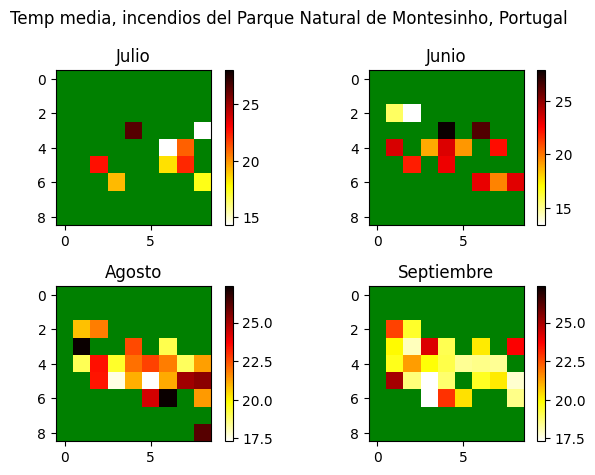

In [15]:
import matplotlib as mpl
cmap = mpl.colormaps["hot_r"]
cmap.set_bad(color="green")
print(np.min(data_jun.temp))

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
im0 = ax0.imshow(map_jun, cmap=cmap, norm="linear", \
                 vmin=np.min(data_jun.temp), vmax=np.max(data_jun.temp))
im1 = ax1.imshow(map_jul, cmap=cmap, norm="linear", \
                 vmin=np.min(data_jul.temp), vmax=np.max(data_jul.temp))
im2 = ax2.imshow(map_aug, cmap=cmap, norm="linear", \
                 vmin=np.min(data_aug.temp), vmax=np.max(data_aug.temp))
im3 = ax3.imshow(map_sep, cmap=cmap, norm="linear", \
                 vmin=np.min(data_aug.temp), vmax=np.max(data_aug.temp))
cbar_im0 = fig.colorbar(im0)
cbar_im1 = fig.colorbar(im1)
cbar_im2 = fig.colorbar(im2)
cbar_im3 = fig.colorbar(im3)
ax0.set_title('Julio')
ax1.set_title('Junio')
ax2.set_title('Agosto')
ax3.set_title('Septiembre')
fig.suptitle("Temp media, incendios del Parque Natural de Montesinho, Portugal")
fig.tight_layout()


In [16]:
fig.savefig("heatmap")

## La siguiente imagen no se ha usado en el trabajo, solo se trata de un intento no concluyente

In [17]:
if use_collab == True:
    # https://www.kaggle.com/datasets/sumitm004/forest-fire-area?resource=downloadcwd = os.getcwd()
    cwd = os.getcwd()
    path = "drive/MyDrive/PEC2, Visualización de datos/historic_demand_year_2023.csv"
else:
    path = r"./datasets_pec2/historic_demand_year_2023.csv"
print("Current Working Directory: ", os.path.join(os.getcwd(), path))

with open(os.path.join(os.getcwd(), path)) as file:
    data = pd.read_csv(file)

# https://www.kaggle.com/datasets/albertovidalrod/electricity-consumption-uk-20092022

file.close()

Current Working Directory:  /content/drive/MyDrive/PEC2, Visualización de datos/historic_demand_year_2023.csv


In [18]:
data.head()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
0,2023-01-01,1,21043,24680,18995,2815,6545,0,15005,0,...,1194,609,903,-896,-451,-529,253,235,998,0
1,2023-01-01,2,21756,25289,19730,2793,6545,0,15005,0,...,1191,596,904,-897,-451,-529,252,157,998,0
2,2023-01-01,3,21348,25269,19327,2773,6545,0,15005,0,...,969,516,983,-910,-451,-529,253,-219,999,0
3,2023-01-01,4,20586,24574,18589,2753,6545,0,15005,0,...,667,510,989,-911,-413,-529,254,-298,999,0
4,2023-01-01,5,19781,24135,17806,2712,6545,0,15005,0,...,387,600,903,-912,-401,-529,253,-679,998,0


In [19]:
df = data[["nd", \
           "embedded_wind_generation", \
           "embedded_solar_generation",
           "settlement_date"]]

from datetime import datetime

aux = df["settlement_date"].copy()
df["settlement_date"] = aux.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df["settlement_month"] = aux.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)


<ipython-input-19-04e9fbceffda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["settlement_date"] = aux.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
<ipython-input-19-04e9fbceffda>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["settlement_month"] = aux.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)


In [20]:
#df.drop(columns="settlement_date")
df = df.groupby(by="settlement_month").mean()
df

,nd,embedded_wind_generation,embedded_solar_generation,settlement_date
settlement_month,,,,
1,30707.014785,2375.643817,520.205645,2023-01-16 00:00:00.000000000
2,29573.839286,1953.708333,834.607143,2023-02-14 12:00:00.000000000
3,29059.331763,1798.514805,1027.709287,2023-03-15 23:40:37.146702336
4,25521.334722,1506.965972,1840.557639,2023-04-15 12:00:00.000000000
5,22944.262769,1098.594086,2383.033602,2023-05-16 00:00:00.000000000
6,22415.633333,1130.432639,2593.452778,2023-06-15 12:00:00.000000000
7,21836.773522,1793.190860,1966.149194,2023-07-16 00:00:00.000000000
8,22269.491263,1440.547715,1897.405242,2023-08-16 00:00:00.000000000
9,23804.768750,1610.125000,1707.200000,2023-09-15 12:00:00.000000000


<Axes: xlabel='settlement_month'>

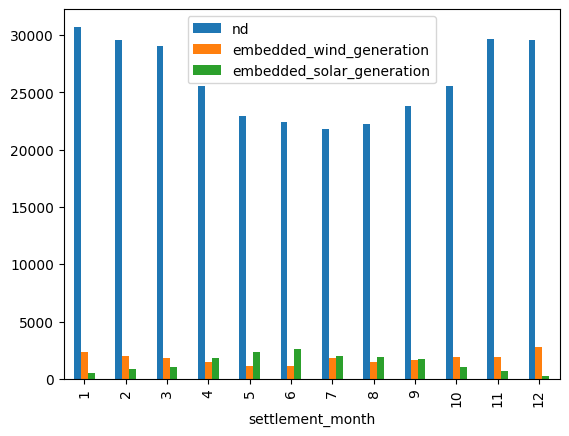

In [21]:
df[['nd', 'embedded_wind_generation', 'embedded_solar_generation']].plot.bar()

In [22]:
df['solar_percent'] = df.embedded_solar_generation / df.nd * 100
df['wind_percent'] = df.embedded_wind_generation / df.nd * 100
df

,nd,embedded_wind_generation,embedded_solar_generation,settlement_date,solar_percent,wind_percent
settlement_month,,,,,,
1,30707.014785,2375.643817,520.205645,2023-01-16 00:00:00.000000000,1.694094,7.736486
2,29573.839286,1953.708333,834.607143,2023-02-14 12:00:00.000000000,2.822113,6.606205
3,29059.331763,1798.514805,1027.709287,2023-03-15 23:40:37.146702336,3.536590,6.189113
4,25521.334722,1506.965972,1840.557639,2023-04-15 12:00:00.000000000,7.211839,5.904730
5,22944.262769,1098.594086,2383.033602,2023-05-16 00:00:00.000000000,10.386185,4.788099
6,22415.633333,1130.432639,2593.452778,2023-06-15 12:00:00.000000000,11.569839,5.043055
7,21836.773522,1793.190860,1966.149194,2023-07-16 00:00:00.000000000,9.003845,8.211794
8,22269.491263,1440.547715,1897.405242,2023-08-16 00:00:00.000000000,8.520200,6.468705
9,23804.768750,1610.125000,1707.200000,2023-09-15 12:00:00.000000000,7.171672,6.763876


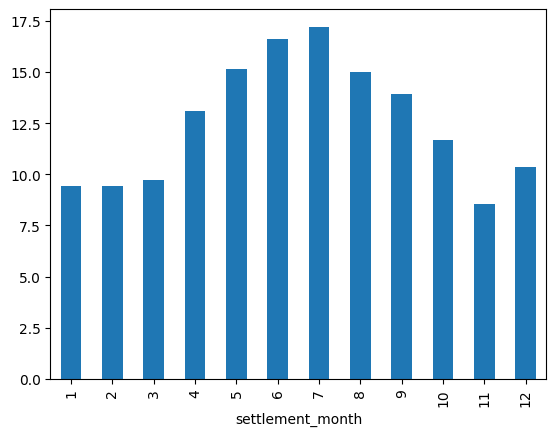

In [23]:
ax = (df['solar_percent']+df['wind_percent']).plot.bar()
ax.set_xtickslabels = np.arange(0, 101, 10)

In [24]:
data_repr = pd.DataFrame(
    data=df['nd'] - (df['embedded_solar_generation'] + \
                                       df['embedded_wind_generation'] + np.mean(df['nd'])),
    index=df.index,
    columns=["net_"]
  )
data_repr


,net_
settlement_month,
1,1738.092106
2,712.450593
3,160.034456
4,-3899.262105
5,-6610.438135
6,-7381.325299
7,-7995.639748
8,-7141.534910
9,-5585.629466


# GDP by Country, Horizon map

In [25]:
if use_collab == True:
    cwd = os.getcwd()
    path = path = "drive/MyDrive/PEC2, Visualización de datos/GPD by Country.csv"
else:
    path = r"./datasets_pec2/GDP by Country.csv"
print("Current Working Directory: ", os.path.join(os.getcwd(), path))

with open(os.path.join(os.getcwd(), path)) as file:
    data = pd.read_csv(file)

# https://www.kaggle.com/datasets/cv13j0/gpd-gpd-per-capita-by-country/data

file.close()

Current Working Directory:  /content/drive/MyDrive/PEC2, Visualización de datos/GPD by Country.csv


In [26]:
data.head()

,Country Name,Year,GDP,GDP per Capita
0,United States,2021,2.299610e+13,69288
1,Luxembourg,2021,8.671080e+10,135683
2,United States,2020,2.089370e+13,63028
3,Luxembourg,2020,7.335313e+10,116356
4,United States,2019,2.137260e+13,65095


In [27]:
paises = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
    'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]
md = data[(data.Year == 2019) & data["Country Name"].isin(paises)]
md = md.drop(columns=["GDP", "Year"])
md.set_index(md["Country Name"], inplace=True)
md = md.drop(columns="Country Name")
md.drop("Luxembourg", inplace=True)
md.drop("Ireland", inplace=True)
md.sort_index(inplace=True)

In [28]:
mean_md = md["GDP per Capita"].mean()

In [29]:
md

,GDP per Capita
Country Name,
Austria,50114
Belgium,46599
Bulgaria,9879
Croatia,15312
Cyprus,29206
Denmark,59776
Estonia,23398
Finland,48629
France,40579


In [30]:
md -= mean_md
md

,GDP per Capita
Country Name,
Austria,18792.565217
Belgium,15277.565217
Bulgaria,-21442.434783
Croatia,-16009.434783
Cyprus,-2115.434783
Denmark,28454.565217
Estonia,-7923.434783
Finland,17307.565217
France,9257.565217


float64


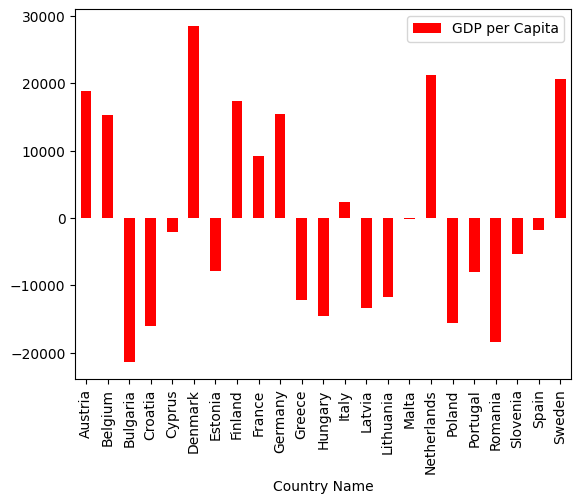

In [31]:

print(md["GDP per Capita"].dtype)
md
ax = md.plot.bar(color=np.where(md['GDP per Capita'] < 0, 'blue', 'red'))

Austria GDP per Capita    18792.565217
Name: Austria, dtype: float64
Belgium GDP per Capita    15277.565217
Name: Belgium, dtype: float64
Bulgaria GDP per Capita   -21442.434783
Name: Bulgaria, dtype: float64
Croatia GDP per Capita   -16009.434783
Name: Croatia, dtype: float64
Cyprus GDP per Capita   -2115.434783
Name: Cyprus, dtype: float64
Denmark GDP per Capita    28454.565217
Name: Denmark, dtype: float64
Estonia GDP per Capita   -7923.434783
Name: Estonia, dtype: float64
Finland GDP per Capita    17307.565217
Name: Finland, dtype: float64
France GDP per Capita    9257.565217
Name: France, dtype: float64
Germany GDP per Capita    15473.565217
Name: Germany, dtype: float64
Greece GDP per Capita   -12187.434783
Name: Greece, dtype: float64
Hungary GDP per Capita   -14585.434783
Name: Hungary, dtype: float64
Italy GDP per Capita    2351.565217
Name: Italy, dtype: float64
Latvia GDP per Capita   -13394.434783
Name: Latvia, dtype: float64
Lithuania GDP per Capita   -11745.434783
Name: L

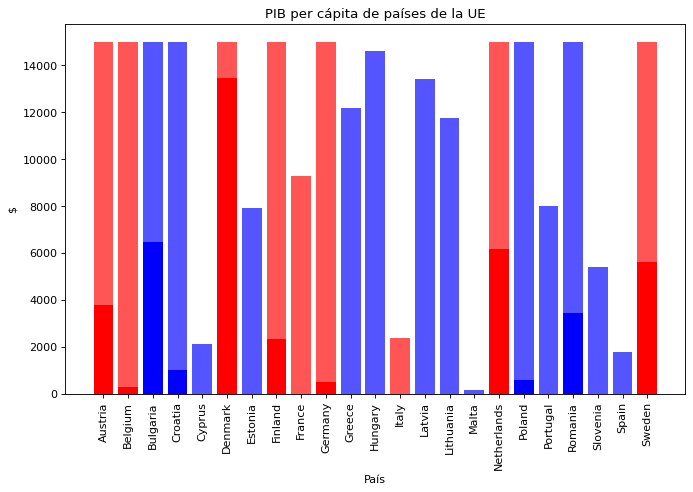

In [37]:
#ax = md.plot.bar(color=np.where(md['GDP per Capita'] < 0, 'blue', 'red'))
#color1 = ["#FF0000" if i<0 else "#0000FF" for i in md['GDP per Capita']]
#plt.plot(md.index, md['GDP per Capita'], color=color1)
#print(md[md['GDP per Capita'] < 0].index)
#ax.bar(x=md[md['GDP per Capita'] < 0].index,
#       height=-md['GDP per Capita'][md['GDP per Capita'] < 0], color="red")

lims = {
    "FF0000": 30000.,
    "FF3535": 15000.,
    "3535FF": 0.,
    "0000FF": -15000.
}

fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.gca()

for index, data in md.iterrows():
  if data[0] < lims["FF0000"] and data[0] > lims["FF3535"]:
    ax.bar(x=index, height=15000., color="#FF5555")
    ax.bar(x=index, height=data[0]-15000, color="#FF0000")
  if data[0] < lims["FF3535"] and data[0] > 0:
    ax.bar(x=index, height=data[0], color="#FF5555")
  if data[0] < lims["3535FF"] and data[0] > lims["0000FF"]:
    ax.bar(x=index, height=-data[0], color="#5555FF")
  if data[0] < lims["0000FF"]:
    ax.bar(x=index, height=15000, color="#5555FF")
    ax.bar(x=index, height=-(data[0]+15000), color="#0000FF")
  print(index, data)

plt.xticks(rotation=90)
#plt.grid()
plt.xlabel("País")
plt.ylabel("$")
plt.title("PIB per cápita de países de la UE")
plt.show()